In [1]:
!pip install pandas scikit-learn matplotlib seaborn nltk ipywidgets


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import ipywidgets as widgets
from IPython.display import display, clear_output


In [3]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional, for wordnet lemmatizer to work better


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
# Load the data
df = pd.read_csv("C:/Users/risha/Downloads/AI-Project/Combined Data.csv")
# Display first 5 rows
df.head()


,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [5]:
df = df.rename(columns={'statement': 'text', 'status': 'label'})


In [6]:
df[['text', 'label']].head()


,text,label
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [7]:
df.info()
df['label'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   text        52681 non-null  object
 2   label       53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: label, dtype: int64

In [10]:
# Define stop words and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Define text preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower().split()  # Convert to lowercase and split into words
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]  # Lemmatize and remove stopwords
    return " ".join(text)  # Join words back into a string

# Apply the preprocessing function to the 'text' column
df['clean_text'] = df['text'].astype(str).apply(preprocess_text)

In [11]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_text'])

# Encode labels
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6672636440757848
                      precision    recall  f1-score   support

             Anxiety       0.78      0.63      0.70       779
             Bipolar       0.89      0.49      0.63       580
          Depression       0.53      0.79      0.63      3100
              Normal       0.80      0.81      0.81      3327
Personality disorder       0.48      0.21      0.30       248
              Stress       0.75      0.11      0.19       557
            Suicidal       0.69      0.53      0.60      2018

            accuracy                           0.67     10609
           macro avg       0.70      0.51      0.55     10609
        weighted avg       0.69      0.67      0.65     10609



In [21]:
text_input = widgets.Textarea(
    value='',
    placeholder='Enter a sentence about your thoughts or mood...',
    description='Your Text:',
    layout=widgets.Layout(width='100%', height='100px')
)

button = widgets.Button(description="Detect Mood", button_style='info')
output = widgets.Output()

def predict_mood(b):
    with output:
        clear_output()
        cleaned = clean_text(text_input.value)
        vec = vectorizer.transform([cleaned])
        pred = model.predict(vec)
        print(f"🧠 Predicted Mood: {pred[0]}")

button.on_click(predict_mood)
display(text_input, button, output)


Textarea(value='', description='Your Text:', layout=Layout(height='100px', width='100%'), placeholder='Enter a…

Button(button_style='info', description='Detect Mood', style=ButtonStyle())

Output()

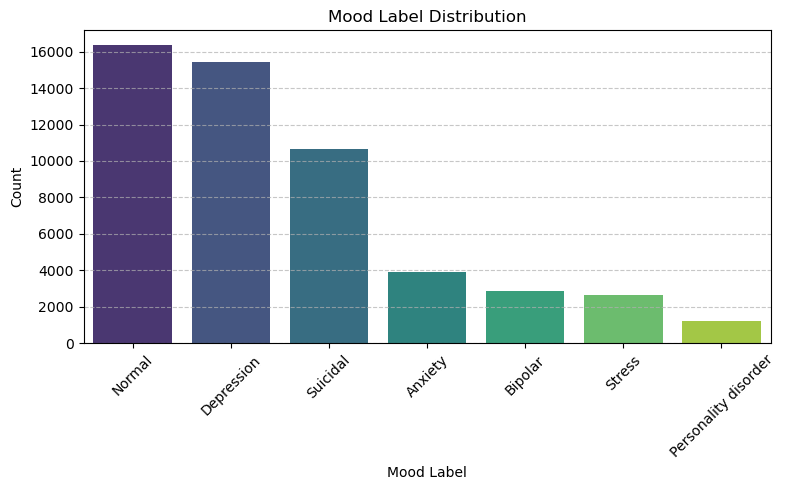

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='viridis')
plt.title("Mood Label Distribution")
plt.xlabel("Mood Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [23]:
!pip install wordcloud


In [24]:
from wordcloud import WordCloud


In [25]:
def show_wordcloud(label):
    text = " ".join(df[df['label'] == label]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Mood: {label}", fontsize=16)
    plt.show()

# Use dropdown for interaction
label_dropdown = widgets.Dropdown(
    options=df['label'].unique(),
    description='Select Mood:',
    value=df['label'].unique()[0],
    style={'description_width': 'initial'}
)

display(label_dropdown)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        show_wordcloud(change['new'])

label_dropdown.observe(on_change)


Dropdown(description='Select Mood:', options=('Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipola…

In [26]:
import joblib


In [27]:
# Save the trained model
joblib.dump(model, "mood_detector_model.pkl")

# Save the vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [28]:
# Load saved model and vectorizer
loaded_model = joblib.load("mood_detector_model.pkl")
loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")


In [68]:
sample_input = "I'm feeling overwhelmed and anxious about my work."
processed_input = preprocess_text(sample_input)
vectorized_input = loaded_vectorizer.transform([processed_input])
loaded_model.predict(vectorized_input)


array(['Depression'], dtype='<U20')

In [29]:
!pip install gradio


In [30]:
import gradio as gr

# Load saved model and vectorizer
import joblib
model = joblib.load("mood_detector_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Define the preprocessing function again (same as used before)
def preprocess_text(text):
    import re
    import string
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer

    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"\@\w+|\#", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\d+", "", text)
    text = " ".join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text

# Define the prediction function
def predict_mood(text):
    processed = preprocess_text(text)
    vect = vectorizer.transform([processed])
    prediction = model.predict(vect)[0]
    return f"Detected Mood: {prediction}"

# Build the Gradio interface
interface = gr.Interface(fn=predict_mood,
                         inputs=gr.Textbox(lines=4, placeholder="Enter your thoughts..."),
                         outputs="text",
                         title="Mental Health Mood Detector",
                         description="Enter a sentence or paragraph, and the model will detect the mood.")

# Launch it inside the notebook
interface.launch(inline=True)


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
